In [33]:
#@title Librerias

import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.integrate import quad
from mpl_toolkits.mplot3d import Axes3D

### **Métodos para Generar Números Aleatorios**

La generación de números aleatorios es fundamental en simulaciones, estadística y métodos numéricos como el de Monte Carlo. Aunque las computadoras no generan "aleatoriedad verdadera" debido a su naturaleza determinista, utilizan algoritmos sofisticados para producir secuencias que se comportan como aleatorias, llamados **generadores de números pseudoaleatorios (PRNGs)**.

---

### **Clasificación de Métodos**

#### 1. **Aleatoriedad Verdadera**
   - Basada en fenómenos físicos impredecibles como ruido térmico, radiación, o fluctuaciones cuánticas.
   - Ejemplo: Generadores hardware basados en ruido eléctrico.
   - Ventajas:
     - Producen números realmente impredecibles.
   - Desventajas:
     - Costosos y lentos para generar grandes cantidades de datos.

#### 2. **Generadores de Números Pseudoaleatorios (PRNGs)**
   - Utilizan algoritmos deterministas que, a partir de una **semilla inicial**, generan una secuencia que parece aleatoria.
   - Ejemplo: Método Congruencial Lineal (LCG).
   - Ventajas:
     - Reproducibles y eficientes.
   - Desventajas:
     - Periodo limitado antes de que las secuencias se repitan.

---



## **Métodos Principales para Generar Números Pseudoaleatorios**

#### **1. Método Congruencial Lineal (LCG)**

Este es uno de los generadores más antiguos y simples. La secuencia de números se calcula mediante:

$$
X_{n+1} = (a X_n + c) \mod m,
$$

donde:
- $X_n$ es el número generado en el paso $n$,
- $a$ es el multiplicador,
- $c$ es el incremento,
- $m$ es el módulo,
- $X_0$ es la semilla inicial.

El valor generado se normaliza a $[0, 1)$ mediante:

$$
U_n = \frac{X_n}{m}.
$$





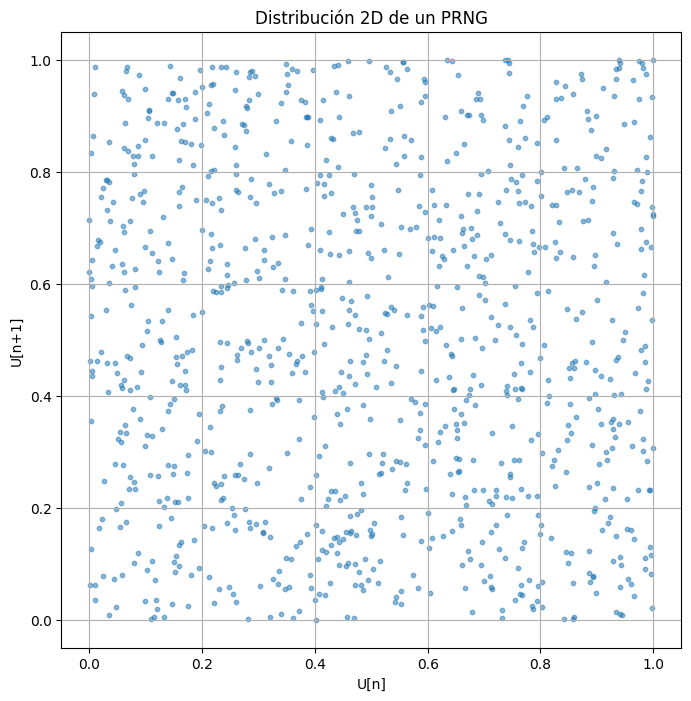

In [3]:
# Parámetros del LCG
a, c, m = 1664525, 1013904223, 2**32
X0 = 1234  # Semilla inicial
N = 1000  # Número de valores a generar

# Generar la secuencia
X = [X0]
for _ in range(N - 1):
    X.append((a * X[-1] + c) % m)

# Normalizar a [0, 1)
U = [x / m for x in X]

# Visualizar los números generados
plt.figure(figsize=(8, 8))
plt.scatter(U[:-1], U[1:], alpha=0.5, s=10)
plt.title("Distribución 2D de un PRNG")
plt.xlabel("U[n]")
plt.ylabel("U[n+1]")
plt.grid()
plt.show()



#### **2. Método de la Transformada Inversa**

Genera números distribuidos según una función de probabilidad $F(x)$. Se basa en invertir la función acumulativa:

$$
U \sim \text{Uniforme}(0, 1) \quad \Rightarrow \quad X = F^{-1}(U).
$$

**Ejemplo: Distribución exponencial**

Para $f(x) = \lambda e^{-\lambda x}$, la función acumulativa es:

$$
F(x) = 1 - e^{-\lambda x}.
$$

Invertimos $F$:

$$
X = -\frac{1}{\lambda} \ln(1-U),
$$

donde $U$ es un número uniforme.

---





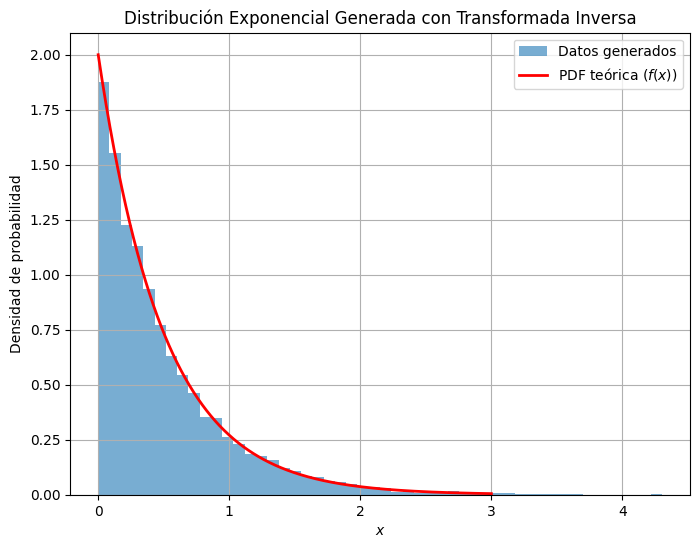

In [5]:
# Parámetros
lambda_param = 2
N = 10000  # Número de muestras

# Generar números uniformes
U = np.random.uniform(0, 1, N)

# Transformada inversa para obtener distribución exponencial
X = -np.log(1 - U) / lambda_param

# Graficar el histograma y la PDF teórica
x_vals = np.linspace(0, 3, 1000)
pdf = lambda_param * np.exp(-lambda_param * x_vals)

plt.figure(figsize=(8, 6))
plt.hist(X, bins=50, density=True, alpha=0.6, label="Datos generados")
plt.plot(x_vals, pdf, 'r', lw=2, label="PDF teórica ($f(x)$)")
plt.title("Distribución Exponencial Generada con Transformada Inversa")
plt.xlabel("$x$")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid()
plt.show()



#### **3. Método de Rechazo (Rejection Sampling)**

Genera números de una distribución compleja $f(x)$ usando una distribución más sencilla $g(x)$.

1. Generar $x \sim g(x)$.
2. Generar $u \sim \text{Uniforme}(0, 1)$.
3. Aceptar $x$ si $u \leq \frac{f(x)}{M g(x)}$, donde $M$ es una constante tal que $\frac{f(x)}{g(x)} \leq M$.





### **Ejemplo de Rejection Sampling para Generar Números de una Distribución No Uniforme**

Vamos a usar el método de rechazo (**rejection sampling**) para generar números aleatorios distribuidos según una **distribución triangular** en el intervalo $[0, 1]$, con una función de densidad de probabilidad dada por:

$$
f(x) = 2x, \quad 0 \leq x \leq 1.
$$

---

### **Concepto**

La distribución triangular tiene un máximo en $x = 1$ y crece linealmente desde 0 a 1. Queremos generar números distribuidos según esta densidad $f(x)$ utilizando como función envolvente una distribución uniforme $g(x)$ en $[0, 1]$.

1. **Función de densidad objetivo**:
   $$ f(x) = 2x. $$

2. **Función envolvente (proposal distribution)**:
   $$ g(x) = 1, \quad \text{para } x \in [0, 1]. $$

3. **Constante $M$**:
   Para garantizar que $f(x) \leq M g(x)$, tomamos $M = 2$, el valor máximo de $f(x)$.

---

### **Algoritmo**

1. Generar un número $x$ uniforme en $[0, 1]$ (de $g(x)$).
2. Generar un número $u$ uniforme en $[0, 1]$.
3. Aceptar $x$ si $u \leq f(x) / (M g(x))$, donde $M = 2$.
4. Rechazar $x$ si no cumple la condición y repetir hasta aceptar.

---

### **Resultados y Observaciones**

1. **Aceptación**: Solo se aceptan las muestras $x$ donde $u \leq f(x) / (M g(x))$. Esto garantiza que las muestras sigan la distribución $f(x)$.
2. **Rechazo**: Los puntos que no cumplen la condición son descartados, lo que hace el método ineficiente si $f(x)$ tiene una baja relación respecto a $M g(x)$.
3. **Eficiencia**: En este caso, $M = 2$ significa que la eficiencia promedio es $50\%$.



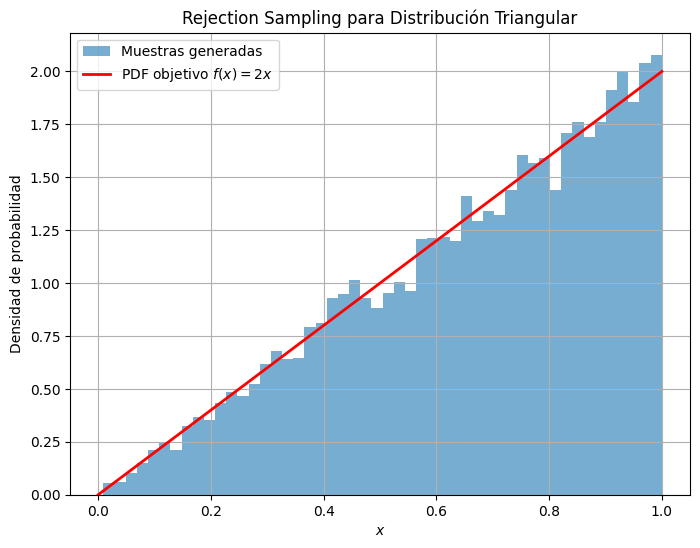

In [8]:
# Parámetros
N = 10000  # Número de muestras deseadas
M = 2      # Constante de escala (máximo de f(x))

# Generar muestras usando rejection sampling
samples = []
while len(samples) < N:
    x = np.random.uniform(0, 1)  # Generar un x de g(x)
    u = np.random.uniform(0, 1)  # Generar un u uniforme
    if u <= 2 * x / M:           # Condición de aceptación
        samples.append(x)

# Graficar resultados
x_vals = np.linspace(0, 1, 1000)
f_vals = 2 * x_vals  # f(x)

plt.figure(figsize=(8, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, label="Muestras generadas")
plt.plot(x_vals, f_vals, 'r', lw=2, label="PDF objetivo $f(x) = 2x$")
plt.title("Rejection Sampling para Distribución Triangular")
plt.xlabel("$x$")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.grid()
plt.show()


### **Cálculo de $\pi$ usando el Método de Rechazo (Rejection Sampling)**

El método de **Rejection Sampling** puede usarse para calcular $\pi$ mediante la estimación del área de un círculo inscrito en un cuadrado. Aprovechamos el hecho de que la relación entre las áreas de un círculo y un cuadrado circunscrito es proporcional a $\pi$.

---

### **Concepto**

Consideremos un círculo de radio $r = 1$ centrado en el origen $(0, 0)$, inscrito en un cuadrado de lado 2 ($[-1, 1] \times [-1, 1]$). La función de densidad para el círculo es:

$$
f(x, y) =
\begin{cases}
1, & \text{si } x^2 + y^2 \leq 1, \\
0, & \text{si } x^2 + y^2 > 1.
\end{cases}
$$

1. **Área del cuadrado:** $4$ (lado 2).
2. **Área del círculo:** $\pi$ (radio 1).

La proporción de puntos dentro del círculo al total de puntos generados en el cuadrado es:

$$
\text{Proporción} = \frac{\text{Área del círculo}}{\text{Área del cuadrado}} = \frac{\pi}{4}.
$$

De aquí se obtiene $\pi$ como:

$$
\pi \approx 4 \cdot \frac{\text{Número de puntos dentro del círculo}}{\text{Número total de puntos}}.
$$

---

### **Algoritmo del Método de Rechazo**

1. Generar $N$ puntos aleatorios $(x, y)$ uniformemente distribuidos en $[-1, 1] \times [-1, 1]$.
2. Evaluar si cada punto está dentro del círculo: $x^2 + y^2 \leq 1$.
3. Contar los puntos dentro del círculo.
4. Calcular $\pi$ usando la proporción mencionada.



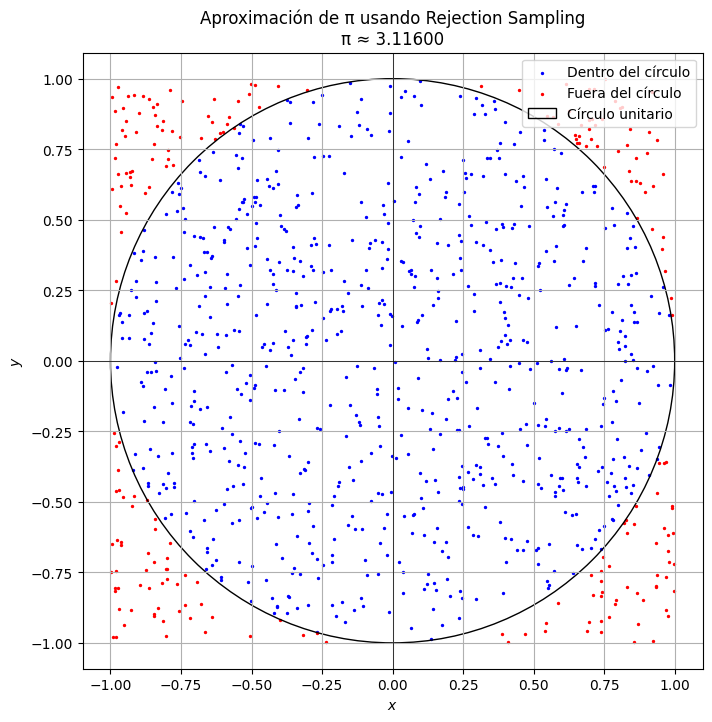

In [10]:
# Parámetros
N = 1000  # Número de puntos aleatorios

# Generar puntos aleatorios en el cuadrado [-1, 1] x [-1, 1]
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)

# Verificar si los puntos están dentro del círculo
inside_circle = x**2 + y**2 <= 1

# Contar los puntos dentro del círculo
num_inside = np.sum(inside_circle)

# Aproximar π
pi_estimate = 4 * num_inside / N

# Graficar
plt.figure(figsize=(8, 8))
plt.scatter(x[inside_circle], y[inside_circle], color='blue', s=2, label="Dentro del círculo")
plt.scatter(x[~inside_circle], y[~inside_circle], color='red', s=2, label="Fuera del círculo")
circle = plt.Circle((0, 0), 1, color='black', fill=False, label="Círculo unitario")
plt.gca().add_artist(circle)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title(f"Aproximación de π usando Rejection Sampling\nπ ≈ {pi_estimate:.5f}")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.axis("equal")
plt.grid()
plt.show()


# Resolución de Integrales Usando el Método de Monte Carlo

El método de Monte Carlo es una técnica probabilística utilizada para aproximar soluciones de problemas matemáticos, como la integración. Este enfoque es particularmente útil para integrales de funciones complejas o en espacios de alta dimensión donde los métodos tradicionales resultan imprácticos.

La integración por Monte Carlo se basa en el promedio de los valores de la función evaluada en puntos aleatorios dentro del dominio de integración. La integral definida de una función $f(x)$ en el intervalo $[a, b]$ se puede escribir como:

$$
I = \int_a^b f(x) \, dx
$$

Reformulando, si generamos puntos $x_1, x_2, \dots, x_N$ distribuidos uniformemente en $[a, b]$, la integral se aproxima mediante:

$$
I \approx \frac{b-a}{N} \sum_{i=1}^N f(x_i),
$$

donde $N$ es el número de puntos aleatorios generados.

En problemas de mayor dimensión, donde el dominio es más complejo, se calcula la integral en una región $\Omega$ utilizando la fórmula:

$$
I \approx \frac{\text{Vol}(\Omega)}{N} \sum_{i=1}^N f(x_i),
$$

donde $\text{Vol}(\Omega)$ es el volumen del dominio $\Omega$, y los puntos $x_i$ se distribuyen uniformemente en $\Omega$.

---

#### **Ventajas y Limitaciones**

- **Ventajas:**
  - Escalabilidad a múltiples dimensiones.
  - No requiere subdividir el dominio en mallas.
  - Flexible para dominios complejos.

- **Limitaciones:**
  - Baja precisión con un número pequeño de muestras.
  - La convergencia es proporcional a $\mathcal{O}(1/\sqrt{N})$.

---





### **Ejemplo 1: Integral de una función unidimensional**

Resolver la integral:

$$
I = \int_0^1 e^{-x^2} \, dx
$$

1. **Paso 1: Generar puntos aleatorios.** Generamos $N$ puntos uniformemente distribuidos en $[0, 1]$.
2. **Paso 2: Evaluar la función.** Calculamos $f(x) = e^{-x^2}$ para cada punto.
3. **Paso 3: Calcular la integral.** Usamos la fórmula:

$$
I \approx \frac{1-0}{N} \sum_{i=1}^N f(x_i).
$$

---


In [34]:
# Parámetros
N = 10000  # Número de puntos
a, b = 0, 1  # Límites de integración

# Generar puntos aleatorios
x = np.random.uniform(a, b, N)

# Evaluar la función
f_x = np.exp(-x**2)

# Aproximar la integral
integral = (b - a) * np.mean(f_x)

print(f'El valor de la integral será: {integral}')


El valor de la integral será: 0.7468569057888415


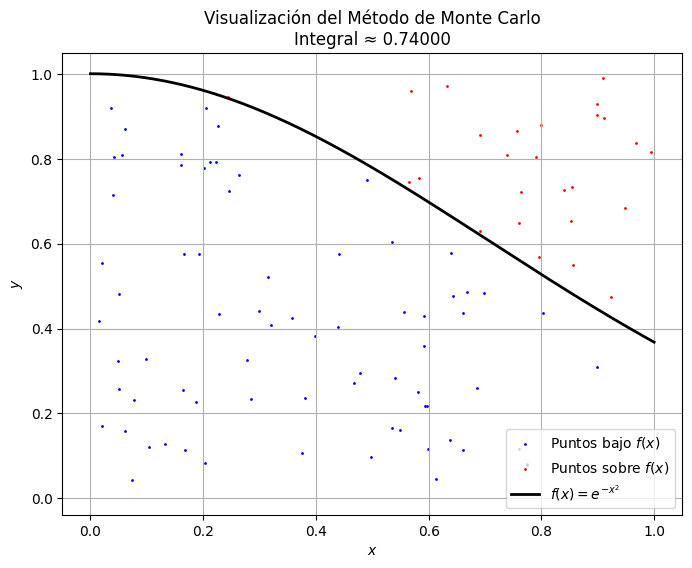

In [26]:
# Parámetros
N = 100  # Número de puntos
a, b = 0, 1  # Límites de integración

# Generar puntos aleatorios
x = np.random.uniform(a, b, N)
y = np.random.uniform(0, 1, N)  # Alturas aleatorias entre 0 y 1

# Evaluar la función
f_x = np.exp(-x**2)

# Identificar puntos bajo la curva
below_curve = y <= np.exp(-x**2)

# Calcular la integral como proporción
integral = (b - a) * np.sum(below_curve) / N

# Graficar
x_curve = np.linspace(a, b, 1000)
f_curve = np.exp(-x_curve**2)

plt.figure(figsize=(8, 6))
plt.scatter(x[below_curve], y[below_curve], color="blue", s=1, label="Puntos bajo $f(x)$")
plt.scatter(x[~below_curve], y[~below_curve], color="red", s=1, label="Puntos sobre $f(x)$")
plt.plot(x_curve, f_curve, color="black", label="$f(x) = e^{-x^2}$", linewidth=2)
plt.title(f"Visualización del Método de Monte Carlo\nIntegral ≈ {integral:.5f}")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.grid()
plt.show()


### **Estimación del Error**

El método de Monte Carlo tiene una convergencia conocida de orden **$O\left(\frac{1}{\sqrt{N}}\right)$** para el error. Esto significa que el error absoluto de la estimación disminuye proporcionalmente al inverso de la raíz cuadrada del número de puntos aleatorios $N$. A mayor número de puntos, el error disminuye, pero con una eficiencia decreciente.


Dado que la integral se estima como:

$$
I \approx (b - a) \cdot \frac{1}{N} \sum_{i=1}^N f(x_i),
$$

la varianza asociada al método de Monte Carlo es proporcional a:

$$
\text{Var}(I) = \frac{\sigma^2}{N},
$$

donde $\sigma^2$ es la varianza de la función $f(x)$ en el intervalo $[a, b]$. El error estándar es entonces:

$$
\text{Error} \approx \sqrt{\text{Var}(I)} \propto \frac{1}{\sqrt{N}}.
$$



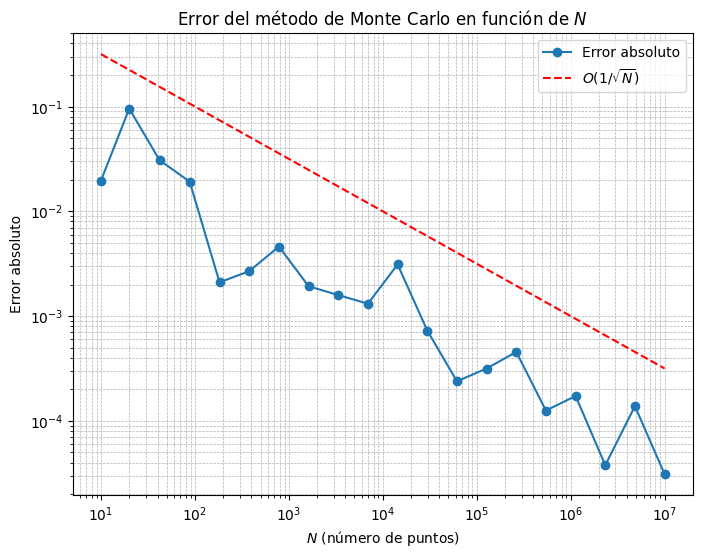

In [17]:
# Valor teórico de la integral
exact_integral, _ = quad(lambda x: np.exp(-x**2), a, b)

# Valores de N para el análisis
N_values = np.logspace(1, 7, 20, dtype=int)  # De 10^1 a 10^5 usando 50 puntos
errors = []

# Calcular la integral y el error para cada N
for N in N_values:
    x = np.random.uniform(a, b, N)
    f_x = np.exp(-x**2)
    monte_carlo_integral = (b - a) * np.mean(f_x)
    errors.append(abs(monte_carlo_integral - exact_integral))

# Graficar el error
plt.figure(figsize=(8, 6))
plt.loglog(N_values, errors, label="Error absoluto", marker="o", linestyle="-")
plt.loglog(N_values, 1 / np.sqrt(N_values), label="$O(1/\\sqrt{N})$", linestyle="--", color="red")
plt.title("Error del método de Monte Carlo en función de $N$")
plt.xlabel("$N$ (número de puntos)")
plt.ylabel("Error absoluto")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()


### **Ejemplo 2: Integral en dos dimensiones**

Calcular el área bajo la función $f(x, y) = \sin(x) \cos(y)$ en el dominio $(x, y) \in [0, \pi] \times [0, \pi/2]$.

1. **Paso 1: Generar puntos aleatorios en el dominio.**
   Generamos $N$ puntos $(x_i, y_i)$ distribuidos uniformemente en $[0, \pi] \times [0, \pi/2]$.
2. **Paso 2: Evaluar la función.**
   Calculamos $f(x, y)$ para cada par $(x_i, y_i)$.
3. **Paso 3: Calcular la integral.**
   Usamos la fórmula:

$$
I \approx \frac{\text{Vol}(\Omega)}{N} \sum_{i=1}^N f(x_i, y_i),
$$

donde $\text{Vol}(\Omega) = \pi \cdot (\pi/2)$.

---



In [36]:
# Parámetros
N = 10000  # Número de puntos
x_min, x_max = 0, np.pi
y_min, y_max = 0, np.pi / 2

# Generar puntos aleatorios
x = np.random.uniform(x_min, x_max, N)
y = np.random.uniform(y_min, y_max, N)

# Evaluar la función
f_xy = np.sin(x) * np.cos(y)

# Aproximar la integral
volumen = (x_max - x_min) * (y_max - y_min)
integral = volumen * np.mean(f_xy)

print(f'El valor de la integral será: {integral}')

El valor de la integral será: 1.9895995686651058


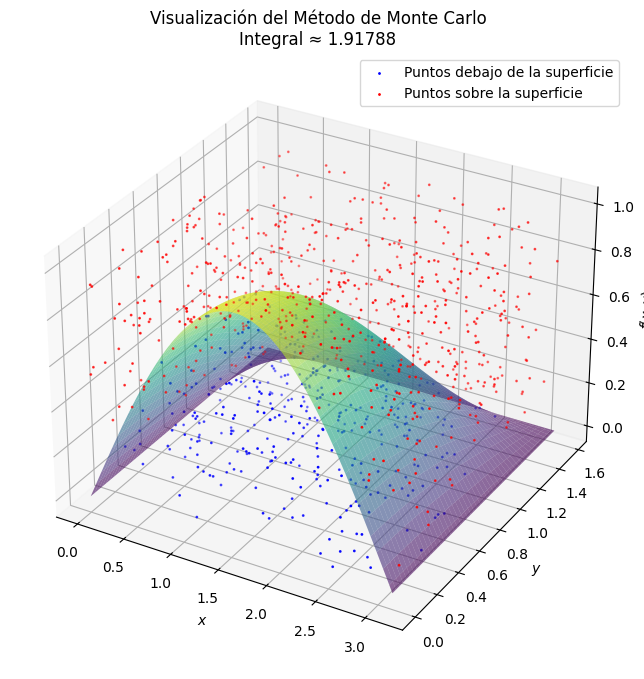

In [47]:
# Parámetros
N = 1000  # Número de puntos
x_min, x_max = 0, np.pi
y_min, y_max = 0, np.pi / 2

# Generar puntos aleatorios
x = np.random.uniform(x_min, x_max, N)
y = np.random.uniform(y_min, y_max, N)

# Evaluar la función
f_xy = np.sin(x) * np.cos(y)

# Generar alturas aleatorias entre 0 y el valor máximo de f(x, y)
z = np.random.uniform(0, np.max(f_xy), N)

# Identificar puntos bajo la superficie
below_surface = z <= f_xy

# Aproximar la integral (volumen) usando Monte Carlo
volumen = (x_max - x_min) * (y_max - y_min)
integral = volumen * np.mean(f_xy)

# Crear una malla para la superficie
x_surface = np.linspace(x_min, x_max, 100)
y_surface = np.linspace(y_min, y_max, 100)
x_mesh, y_mesh = np.meshgrid(x_surface, y_surface)
z_surface = np.sin(x_mesh) * np.cos(y_mesh)

# Crear el gráfico
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Superficie de la función
ax.plot_surface(x_mesh, y_mesh, z_surface, cmap='viridis', alpha=0.6)

# Puntos debajo de la superficie
ax.scatter(x[below_surface], y[below_surface], z[below_surface], color="blue", s=1, label="Puntos debajo de la superficie")
# Puntos sobre la superficie
ax.scatter(x[~below_surface], y[~below_surface], z[~below_surface], color="red", s=1, label="Puntos sobre la superficie")

# Título con el valor de la integral
ax.set_title(f"Visualización del Método de Monte Carlo\nIntegral ≈ {integral:.5f}")

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$f(x, y)$")

# Mostrar leyenda
ax.legend()




# Hacer el gráfico interactivo
plt.ion()  # Habilita la interactividad

plt.show()